Import Packages 

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro, spearmanr
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

File Managment 

In [2]:
# File Management
filename = 'rawdata'
filepath = f"{filename}.xlsx"
data = pd.read_excel(filepath)


Data Check #1

In [3]:
# Display the first five rows of the data for a check
data.head(n=5)


,Facility Name,Municipality,BWA,BWA Periods,BWA Days,Unknown,Wind,Flooding,Break,Repairs,...,No Samples per month,Parameters Tested,Classified,Year Classified,SWS,Higher,Certified Operator,No Operators,Male,Female
0,Beddis,CRD,1,3,16,0,2,0,1,0,...,921,13,1,2007,1,0,1,3,3,0
1,Cedar Lane,CRD,1,1,1,1,0,0,0,0,...,588,8,1,2005,1,0,1,3,3,0
2,Cedars of Tuam,CRD,0,0,0,0,0,0,0,0,...,574,8,1,2011,1,0,1,2,2,0
3,Fulford,CRD,1,1,6,0,0,0,1,0,...,648,13,1,2007,1,0,1,3,3,0
4,H/F,CRD,1,12,53,0,2,0,8,1,...,1239,12,1,1993,0,1,1,2,2,0


Data Check #2

In [4]:
# Display the column info to check to see how many rows of data you have and if there are any nan values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Facility Name         32 non-null     object 
 1   Municipality          32 non-null     object 
 2   BWA                   32 non-null     int64  
 3   BWA Periods           32 non-null     int64  
 4   BWA Days              32 non-null     int64  
 5   Unknown               32 non-null     int64  
 6   Wind                  32 non-null     int64  
 7   Flooding              32 non-null     int64  
 8   Break                 32 non-null     int64  
 9   Repairs               32 non-null     int64  
 10  Ecoli                 32 non-null     int64  
 11  TC                    32 non-null     int64  
 12  Turb                  32 non-null     int64  
 13  Connections           32 non-null     int64  
 14  Residential           32 non-null     int64  
 15  Institutional         32 

Check if Data is Normal: Using Shapiro-Wilk Test and Histograms

In [5]:
# Separate the numerical and non-numerical variables
numeric_vars = data.select_dtypes(include=['int', 'float']).columns.tolist()
non_numeric_vars = data.select_dtypes(exclude=['int', 'float']).columns.tolist()

# Create a folder to store histograms
if not os.path.exists('histograms'):
    os.makedirs('histograms')

# Perform Shapiro-Wilk test and create comparative histograms
results = []
for var in numeric_vars:
    data_range = np.ptp(data[var])  # Calculate the range of the data
    if data_range > 0:
        stat, p = shapiro(data[var])
        normality = 'Data is normally distributed' if p > 0.05 else 'Data is not normally distributed'
        results.append({'Variable': var, 'Statistic': stat, 'p-value': p, 'Normality': normality})
        sns.histplot(data=data, x=var, kde=True, stat='density')
        plt.title(f'Histogram of {var}')
        plt.savefig(f'histograms/Histogram of {var}.png')  # Save the histograms in the histograms folder
        plt.close()  # Close the current figure
    else:
        print(f"Skipped Shapiro-Wilk test for {var} due to zero data range.")

results = pd.DataFrame(results)
results.to_excel('normality_test_results.xlsx', index=False)  # Save the results to an Excel file
print('Results saved to normality_test_results.xlsx')


Skipped Shapiro-Wilk test for Residential  due to zero data range.
Skipped Shapiro-Wilk test for Infastructure Age due to zero data range.
Results saved to normality_test_results.xlsx


Preform Spearman's Rank Correlation Analysis 

In [6]:
# Apply Spearman's rank correlation to the numerical variables
results2 = []
for i in range(len(numeric_vars)):
    for j in range(i+1, len(numeric_vars)):
        var1, var2 = numeric_vars[i], numeric_vars[j]
        data_range1 = np.ptp(data[var1])  # Calculate the range of the data
        data_range2 = np.ptp(data[var2])  # Calculate the range of the data
        if data_range1 > 0 and data_range2 > 0:
            corr, p = spearmanr(data[var1], data[var2])
            if p < 0.05:
                correlation = 'Positive' if corr > 0 else 'Negative'
            else:
                correlation = 'Not significant'
            results2.append({'Variable 1': var1, 'Variable 2': var2, 'Spearman Correlation': corr, 'p-value': p, 'Correlation': correlation})
        else:
            print(f"Skipped Spearman correlation calculation for ({var1}, {var2}) due to zero data range.")
            
results2_data = pd.DataFrame(results2)
results2_data.to_csv('spearman_correlations.csv', index=False)
print('Spearman correlations saved to spearman_correlations.csv')



Skipped Spearman correlation calculation for (BWA, Residential ) due to zero data range.
Skipped Spearman correlation calculation for (BWA, Infastructure Age) due to zero data range.
Skipped Spearman correlation calculation for (BWA Periods, Residential ) due to zero data range.
Skipped Spearman correlation calculation for (BWA Periods, Infastructure Age) due to zero data range.
Skipped Spearman correlation calculation for (BWA Days, Residential ) due to zero data range.
Skipped Spearman correlation calculation for (BWA Days, Infastructure Age) due to zero data range.
Skipped Spearman correlation calculation for (Unknown, Residential ) due to zero data range.
Skipped Spearman correlation calculation for (Unknown, Infastructure Age) due to zero data range.
Skipped Spearman correlation calculation for (Wind, Residential ) due to zero data range.
Skipped Spearman correlation calculation for (Wind, Infastructure Age) due to zero data range.
Skipped Spearman correlation calculation for (Flo

Plot Spearman's Rank Correlation Parameters 

In [7]:
# create a folder for the correlation plots if it doesn't exist
if not os.path.exists('correlation_plots'):
    os.makedirs('correlation_plots')

# filter the dataframe to include only significant correlations
significant_corr = results2_data[(results2_data['Correlation'] != 'Not significant') & (results2_data['p-value'] < 0.05)]

# loop through significant correlations and plot scatter plots
for idx, row in significant_corr.iterrows():
    var1, var2, corr, p, direction = row['Variable 1'], row['Variable 2'], row['Spearman Correlation'], row['p-value'], row['Correlation']
    color = 'green' if direction == 'Positive' else 'red'
    plt.scatter(data[var1], data[var2], color=color)
    plt.title(f"{var1} vs {var2} ({direction} Correlation)")
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.savefig(f"correlation_plots/{var1}_vs_{var2}_{direction}.png") # save plot to a file in the correlation_plots folder
    plt.close() # clear plot before creating next one


Logistic Regression Analysis 

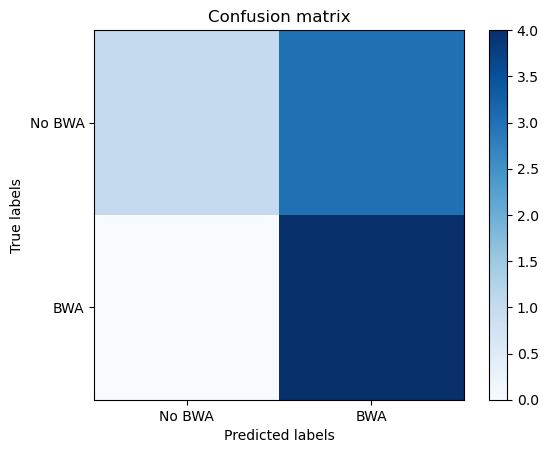

In [8]:
# Load the data into a pandas DataFrame
df = data[significant_corr['Variable 1'].tolist() + ['BWA']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.25)

# Create an instance of the LogisticRegression class
logreg = LogisticRegression(max_iter=10000)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the probability of being on a drinking water advisory for the test data
y_pred_prob = logreg.predict_proba(X_test)
# Use the trained model to make predictions
y_pred = logreg.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([0, 1], ["No BWA", "BWA"])
plt.yticks([0, 1], ["No BWA", "BWA"])
plt.title("Confusion matrix")
plt.colorbar()
plt.show()

Logistic Regression Model Output 

In [9]:
# Get the coefficients and names of the predictors
coef = logreg.coef_[0]
predictor_names = X_train.columns.tolist()

# Create a DataFrame to store the coefficients and predictor names
coef_df = pd.DataFrame({'Predictor': predictor_names, 'Coefficient': coef})

# Group the coefficients by predictor variable and get the average coefficient value
coef_df = coef_df.groupby('Predictor')['Coefficient'].mean().reset_index()

# Export the coefficients to an Excel file
coef_df.to_excel('coefficients.xlsx', index=False)